# Final Project Submission

Please fill out:
* Student name: Chris Flynn
* Student pace: self pace
* Scheduled project review date/time: 6/15/2022 12:30 PM MTN?
* Instructor name: Morgan Jones
* Blog post URL:  https://medium.com/@ceflynn_6158


# Microsoft Movie Studio
## Project Overview
For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data Used

Box Office Mojo - bom.movie_gross.csv.gz
IMDB - im.db.zip
The Numbers - tn.movie_budgets.csv.gz




# Importing Modules

In [1]:
#Importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import datetime
%matplotlib inline

# Compete with Major Studios
___
## Create a Dataframe From BoxOfficeMovie.com
'movie_gross_df' from the bom.movie_gross.csv.gz file in the zippedData folder

In [2]:
# read the csv file
bom_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [3]:
#check out the dataframe for missing values
bom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Cleaning

Looks like there is 5 missing the studio, and 28 missing domestic_gross.  Many are missing foreign_gross.  

-Drop the ones without studio
-figure out what to do with the movies without domestic_gross, foriegn_gross

In [4]:
#drop the movies without studio names
with_studio_df = bom_df[bom_df['studio'].notna()].copy()
with_studio_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## Handling NaN
Make all of the NaN in domestic_gross 0 and foriegn_gross we can change to float and then make it 0

In [5]:
#change NaN to 0 - foriegn gross needs to be a float64
with_studio_df['domestic_gross'] = with_studio_df['domestic_gross'].fillna(0)

with_studio_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


In [6]:
#foriegn gross needs to be a float64
#we can leave it alone and then create a new column in the dataframe to show the total
with_studio_df['foreign_gross'][0] #str
with_studio_df['domestic_gross'][0] #float
#sample calculation
float(with_studio_df['foreign_gross'][0]) + with_studio_df['domestic_gross'][0]
#create a copy of the dataframe just in case
bom_clean_df = with_studio_df.copy()


## Commas Preventing Type Change
The foriegn_gross colunmn needs some more cleaning -- need to find the values that can't be converted to floats


In [7]:
#bom_clean_df['foriegn_gross']=bom_clean_df['foreign_gross'].astype(float)
#seraching for this value
bom_clean_df[bom_clean_df['foreign_gross']=='1,131.6']

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015


That is a prety big movie.  There are probably many others that have the comma.  This needs to be resolved....

In [8]:
#find the values with the commas
bom_clean_df.sort_values('foreign_gross').head(20)

,title,studio,domestic_gross,foreign_gross,year
2760,The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1874,Furious 7,Uni.,353000000.0,"1,163.0",2015
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3009,City of Ghosts,IFC,128000.0,100000,2017
596,The Time That Remains,IFC,32900.0,1000000,2011
955,Kid With a Bike,IFC,1500000.0,1000000,2012
594,Vanishing on 7th Street,Magn.,22700.0,1000000,2011
970,2 Days in New York,Magn.,633000.0,1000000,2012


## Conflicted Values Foreign Gross
The values with the commas are supposed to be big numbers.  Will have to find a way to handle these films.  There are only 5.  These are preventing the column from being switched to float.  Going to get this data from Box Office Mojo 
Numbers appear to be abbreviated

The Fate of the Furious 1,010.0  --> 1,009,996,733

Jurassic World	Uni. 1,019.4 --> 1,018,130,012

Star Wars: The Force Awakens 1,131.6--> 1,131,561,399

Furious 7 1,163.0 --> 1,162,040,651	

Avengers: Infinity War  1,369.5 -->  1,369,544,272

**need to be careful for movies spelled differently

## Change the values for the movies above
Using the id numbers and values from Box Office Mojo we can create a dictionary then loop through the keys and change the values.

In [9]:
# Dictionary 'change_dict' will hold the key, values for the movies found.  See above
change_dict = {'The Fate of the Furious': 1009996733, 
               'Jurassic World': 1018130012, 
               'Star Wars: The Force Awakens':1131561399, 
               'Furious 7':1162040651, 
               'Avengers: Infinity War':1369544272}





In [10]:
#test bom_clean_df with one of the key value pairs
bom_clean_df[bom_clean_df['title'] == 'Furious 7']

,title,studio,domestic_gross,foreign_gross,year
1874,Furious 7,Uni.,353000000.0,"1,163.0",2015


In [11]:
#loop through the dictionary to get the key value pairs - 
for index, (key, value) in enumerate(change_dict.items()):
     bom_clean_df.loc[bom_clean_df.title == key, 'foreign_gross'] = value
        


In [12]:
#test the loop!
bom_clean_df[bom_clean_df['title'] == 'Avengers: Infinity War']

,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000.0,1369544272,2018


## Change Column Type to Int 64

In [13]:
#check data types 
bom_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 318.5+ KB


In [14]:
#create a copy called final_bom_df
final_bom_df = bom_clean_df.copy()
final_bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [15]:
#change the NAN in 'foreign_gross' to 0
final_bom_df['foreign_gross'] = final_bom_df['foreign_gross'].fillna(0)


In [16]:
#check the info to see if this worked
final_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 318.5+ KB


In [17]:
#convert 'foreign_gross' to integer type
final_bom_df["foreign_gross"] = pd.to_numeric(final_bom_df["foreign_gross"])
final_bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   int64  
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 318.5+ KB


## Find Total_Gross for each film
add the 'domestic_gross' and 'foreign_gross'


In [18]:
final_bom_df['total_gross'] = final_bom_df['domestic_gross'] + final_bom_df['foreign_gross']
final_bom_df


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0,2018,2.400000e+03


In [19]:

## Drop Columns 
#keep title, studio, total_gross


#drop columns 'domestic_gross','foreign_gross', 'year'
final_bom_df = final_bom_df.drop(columns=['domestic_gross','foreign_gross', 'year'])
final_bom_df.head()

,title,studio,total_gross
0,Toy Story 3,BV,1.067000e+09
1,Alice in Wonderland (2010),BV,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,9.603000e+08
3,Inception,WB,8.283000e+08
4,Shrek Forever After,P/DW,7.526000e+08


In [20]:
#group by studio -- create new df 'studio_gross'
studio_gross = final_bom_df.groupby(['studio']).sum()
studio_gross.head()

,total_gross
studio,
3D,16000000.0
A23,164200.0
A24,562656400.0
ADC,248200.0
AF,5642900.0


In [21]:
#sort the studios by total_Gross -- display top 10
studio_gross = studio_gross.sort_values('total_gross',ascending=False)
studio_gross.head(10)

,total_gross
studio,
BV,4.671399e+10
Uni.,3.294733e+10
Fox,3.100537e+10
WB,3.083595e+10
Sony,2.240504e+10
Par.,1.954926e+10
WB (NL),1.033470e+10
LGF,8.601583e+09
LG/S,5.431924e+09


## Data Visualization for Studio Total Gross
create a bar chart of the top six studios by total_gross

<AxesSubplot:title={'center':'Top 10 highest Grossing Studios'}, ylabel='studio'>

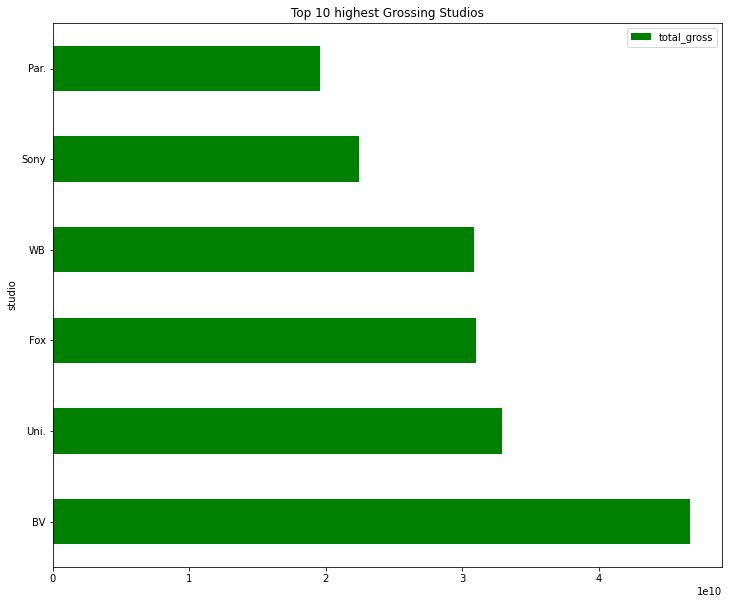

In [22]:
#total_gross
studio_gross.head(6).plot.barh(title="Top 10 highest Grossing Studios", figsize=(12,10),color='g')


## Get Profit Data
use tn.movie_budgets.csv.gz 

In [23]:
budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Cleaning for Profits by Movie
we will subtract the 'production_budget' from 'worldwide_gross'.  We will need to clean up those columns and change their type


In [25]:
#strip the dollar signs and columns from each column
columns_change=['production_budget','worldwide_gross']
for c in columns_change:
    budget_df[c] = budget_df[c].str.strip('$')
    budget_df[c] = budget_df[c].replace(',','', regex=True)


budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747


In [26]:
#change production_budget and worldwide_gross to numeric
budget_df['production_budget'] = pd.to_numeric(budget_df['production_budget'])
budget_df['worldwide_gross'] = pd.to_numeric(budget_df['worldwide_gross'])
#check data types
budget_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


## Creat Column for profit 
create profit column and perform calculations


In [27]:
#make copy of dataframe - profit
profit_df = budget_df.copy()
#Make column profit in billions 
profit_df['Profit In Billions'] = (profit_df['worldwide_gross'] - profit_df['production_budget'] )/ 1000000000
profit_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit In Billions
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2.351345
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,0.635064
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-0.200238
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1.072414
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,0.999722
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,-0.000007
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,0.000234
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,-0.000004
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,-0.000001


## Create a DataFrame to Merge 
it will be easier if we drop unecessary columns now and change the 'movie' column to 'title'

In [28]:
#create dataframe 'to_merge_df'
to_merge_df = profit_df[['movie','Profit In Billions','release_date']].copy()
to_merge_df.head()

#change movie column to 'title'
to_merge_df = to_merge_df.rename(columns={'movie':'title','release_date':'year'})
to_merge_df.head()



,title,Profit In Billions,year
0,Avatar,2.351345,"Dec 18, 2009"
1,Pirates of the Caribbean: On Stranger Tides,0.635064,"May 20, 2011"
2,Dark Phoenix,-0.200238,"Jun 7, 2019"
3,Avengers: Age of Ultron,1.072414,"May 1, 2015"
4,Star Wars Ep. VIII: The Last Jedi,0.999722,"Dec 15, 2017"


## Change Release Date Column
only have the 4 digit year 


In [29]:
#convert column to datetime
to_merge_df['year'] = pd.to_datetime(to_merge_df['year'], format='%b %d, %Y')
to_merge_df['year'] = pd.DatetimeIndex(to_merge_df['year']).year
to_merge_df.head()


,title,Profit In Billions,year
0,Avatar,2.351345,2009
1,Pirates of the Caribbean: On Stranger Tides,0.635064,2011
2,Dark Phoenix,-0.200238,2019
3,Avengers: Age of Ultron,1.072414,2015
4,Star Wars Ep. VIII: The Last Jedi,0.999722,2017


In [30]:
#test data types
to_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               5782 non-null   object 
 1   Profit In Billions  5782 non-null   float64
 2   year                5782 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 135.6+ KB


## Merge Profit Data with Studio Data
This will give us the most profitable studios
We could also do a rating / profit comparison if time allows...

'to_merge_df' has the profit data -
'final_bom_df' has the box office mojo data with studio names


In [31]:
##merge the two tables, drop total gross, year
profit_studio_df = final_bom_df.merge(to_merge_df)
profit_studio_df = profit_studio_df.groupby(['studio']).sum()
profit_studio_df = profit_studio_df.drop(columns=['total_gross','year'])
#charting data 
chart_data = profit_studio_df.reset_index()
chart_data.head()


,studio,Profit In Billions
0,3D,0.011515
1,A24,0.256905
2,ALP,-0.023076
3,ATO,-0.010228
4,Affirm,0.024471


## Sort the chart_data
sort descending 

In [32]:
chart_data = chart_data.sort_values('Profit In Billions', ascending=False)
chart_data.head(6) 

,studio,Profit In Billions
15,BV,23.835218
90,Uni.,20.731588
32,Fox,19.040313
94,WB,13.996112
82,Sony,12.551310
69,Par.,9.668207


## Get Full Studio Names
use a dictionary with the abbrev. to get the full studio name.  Should look better on graph


In [33]:
#dictionary of studio names
studio_dict={'BV':'Buena Vista',
            'Uni.': 'Universal Pictures',
            'Fox':'Fox Studios',
            'WB': 'Warner Brothers',
            'Sony':'Sony Pictures',
            'Par.': 'Paramount Pictures'}
#change studio column using dictionary
chart_data = chart_data.replace({'studio':studio_dict})

## Data Visualization for Movie Studio Profit
Make a bar chart this should be a better use of data then the total_gross chart.
only display the top 6








([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

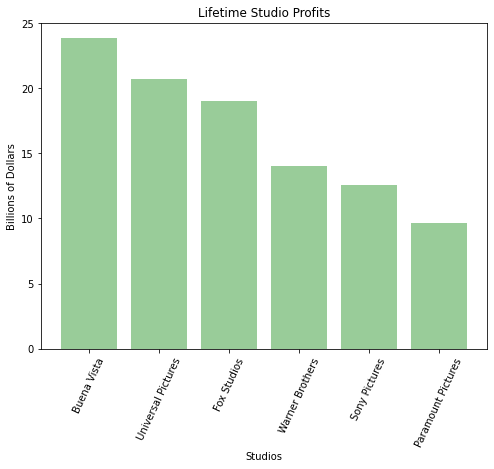

In [34]:
#data to plot
x_val = chart_data.studio.head(6)
y_val = chart_data['Profit In Billions'].head(6)
# Set up the plot
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(x_val,y_val,color="g",alpha=0.4)
plt.title("Lifetime Studio Profits")
plt.xlabel('Studios')
plt.ylabel('Billions of Dollars')
plt.xticks(rotation = 65)

## Top Studio Profits
As expected these are all major studios.  Micrsoft should be aiming to compete with these studios. These studios create blockbuster movies and build movie franchises.

## Limitations
Most likely data was lost during the merge process, most likely from smaller studio movies.  It may be worth investigating at a later date.  This is also lifetime profits.  Data could be limited to a more recent time span.  Th

# Multi-Genre Movies
___

## Create a Dataframe from the IMDB file in the zippedData folder

Write a query to join the movie_basics and movie_ratings tables.  We want to see all movies with atleast 5000 votes(popular movies) and rating above 7(high quality movies).  

rating_df is the DataFrame

In [35]:
conn = sqlite3.connect('im.db')
cur = conn.cursor()
q= """SELECT 
             primary_title as Title,
             start_year as Year,
             genres as Genre,
             averagerating as Rating,
             numvotes as Votes
        FROM movie_basics
        JOIN movie_ratings
             USING(movie_id)
       
       WHERE votes > 5000 AND rating >= 7    
       ORDER BY rating DESC
            
                 ;"""
rating_df = pd.read_sql(q,conn)
rating_df.head()

    

,Title,Year,Genre,Rating,Votes
0,Once Upon a Time ... in Hollywood,2019,"Comedy,Drama",9.7,5600
1,Aloko Udapadi,2017,"Drama,History",9.5,6509
2,Peranbu,2018,Drama,9.4,9629
3,The Mountain II,2016,"Action,Drama,War",9.3,100568
4,Aynabaji,2016,"Crime,Mystery,Thriller",9.3,18470


## Explore / Clean up the Genres Column  
Look at the counts and determine which sub categories (new columns) need to be created.  Multi-Genre(boolean) would be a good start.

In [36]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1322 non-null   object 
 1   Year    1322 non-null   int64  
 2   Genre   1322 non-null   object 
 3   Rating  1322 non-null   float64
 4   Votes   1322 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 51.8+ KB


## Fortunately, there are no missing values in this subgroup.

In [37]:
rating_df.Genre.value_counts()

Drama                       109
Comedy,Drama                 81
Drama,Romance                54
Documentary                  46
Comedy,Drama,Romance         46
                           ... 
Comedy,Drama,History          1
Drama,Mystery,Western         1
Animation,History             1
Drama,Family,Romance          1
Comedy,Documentary,Drama      1
Name: Genre, Length: 231, dtype: int64

## Add a Multi-Genre column and fill with boolean values.  True if ',' exists.  False if only one category

In [38]:
example = ',' in rating_df['Genre'][0]
example

True

## Now try for all of them... lambda function opportunity...

In [39]:
rating_df['Multi-Genre'] = rating_df['Genre'].map(lambda x: ',' in x)
rating_df.head()

,Title,Year,Genre,Rating,Votes,Multi-Genre
0,Once Upon a Time ... in Hollywood,2019,"Comedy,Drama",9.7,5600,True
1,Aloko Udapadi,2017,"Drama,History",9.5,6509,True
2,Peranbu,2018,Drama,9.4,9629,False
3,The Mountain II,2016,"Action,Drama,War",9.3,100568,True
4,Aynabaji,2016,"Crime,Mystery,Thriller",9.3,18470,True


In [40]:
#get value counts for Multi-Genre
rating_df['Multi-Genre'].value_counts()

True     1145
False     177
Name: Multi-Genre, dtype: int64

## Data Visualization for Popular Top-Rated Movies
Looking at the data from the value_counts() above an overwhelming majority of the popular highly rated movies were listed in multiple genres.  Below is a bar chart showing the data.  (would this be better as a %????)

Text(0, 0.5, 'Number of Movies')

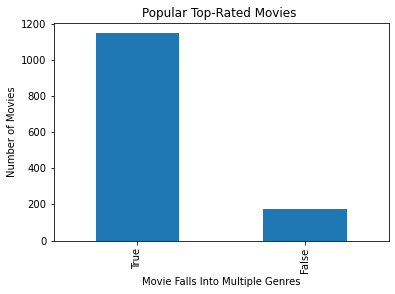

In [41]:
#plot bar chart
rating_df['Multi-Genre'].value_counts().plot(kind='bar');
plt.title("Popular Top-Rated Movies ")
plt.xlabel("Movie Falls Into Multiple Genres")
plt.ylabel("Number of Movies")

In [42]:
#value counts
rating_df['Multi-Genre'].value_counts()

True     1145
False     177
Name: Multi-Genre, dtype: int64

## Find the Genres
Create a subset data frame to get the most common genres from the multi-genre movies.  We will use these later to create more boolean columns in rating_df.

In [43]:
multi_df = rating_df[rating_df['Multi-Genre']==True]
multi_df

,Title,Year,Genre,Rating,Votes,Multi-Genre
0,Once Upon a Time ... in Hollywood,2019,"Comedy,Drama",9.7,5600,True
1,Aloko Udapadi,2017,"Drama,History",9.5,6509,True
3,The Mountain II,2016,"Action,Drama,War",9.3,100568,True
4,Aynabaji,2016,"Crime,Mystery,Thriller",9.3,18470,True
6,CM101MMXI Fundamentals,2013,"Comedy,Documentary",9.2,41560,True
...,...,...,...,...,...,...
1317,The Silence,2010,"Crime,Drama,Thriller",7.0,5792,True
1318,Raw,2016,"Drama,Horror",7.0,49570,True
1319,Game Night,2018,"Action,Comedy,Crime",7.0,163279,True
1320,Crimea,2017,"Action,Drama",7.0,32800,True


# Focus on Biographies
___
## List of Genres 
create a list of genres.  Need to go through each row and split on the commas.  Then check to see if those items are already in the list before adding them.  

In [44]:
#list to hold the genres
genre_list = []
#function to get all the genres separated and added to the list
def get_genre(row):
    words = row.split(',')
    for w in words:
        if w not in genre_list:
            genre_list.append(w)

#lambda function to get the entire dataframe
multi_df['Genre'].map(lambda x: get_genre(x))
genre_list


['Comedy',
 'Drama',
 'History',
 'Action',
 'War',
 'Crime',
 'Mystery',
 'Thriller',
 'Documentary',
 'Biography',
 'Music',
 'Musical',
 'Romance',
 'Adventure',
 'Sci-Fi',
 'Sport',
 'Animation',
 'Western',
 'Fantasy',
 'Horror',
 'Family',
 'News']

## Columns for each Genre
Adding columns to rating_df for each category and entering the boolean value

In [45]:
# loop through genre_list and create a new column and then check if 
#that genre is listed in the main genre category
subgenre_df = rating_df.copy(deep=True)
for g in genre_list:
    subgenre_df[g] = subgenre_df['Genre'].map(lambda x: g in x)
subgenre_df    


,Title,Year,Genre,Rating,Votes,Multi-Genre,Comedy,Drama,History,Action,...,Romance,Adventure,Sci-Fi,Sport,Animation,Western,Fantasy,Horror,Family,News
0,Once Upon a Time ... in Hollywood,2019,"Comedy,Drama",9.7,5600,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Aloko Udapadi,2017,"Drama,History",9.5,6509,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Peranbu,2018,Drama,9.4,9629,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,The Mountain II,2016,"Action,Drama,War",9.3,100568,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,Aynabaji,2016,"Crime,Mystery,Thriller",9.3,18470,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,The Silence,2010,"Crime,Drama,Thriller",7.0,5792,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1318,Raw,2016,"Drama,Horror",7.0,49570,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1319,Game Night,2018,"Action,Comedy,Crime",7.0,163279,True,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1320,Crimea,2017,"Action,Drama",7.0,32800,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


## Count Column Data
get counts for each of the columns

In [46]:
#use the genre_list to find the counts of each group
#creating key,value pairs for dictionary of sums
genre_count_dict ={}
for g in genre_list:
    genre_count_dict[g] = subgenre_df[g].sum()
genre_count_dict

{'Comedy': 351,
 'Drama': 893,
 'History': 91,
 'Action': 277,
 'War': 38,
 'Crime': 216,
 'Mystery': 94,
 'Thriller': 183,
 'Documentary': 140,
 'Biography': 193,
 'Music': 57,
 'Musical': 10,
 'Romance': 169,
 'Adventure': 194,
 'Sci-Fi': 65,
 'Sport': 40,
 'Animation': 92,
 'Western': 7,
 'Fantasy': 58,
 'Horror': 36,
 'Family': 38,
 'News': 5}

## Data Visualization - Genres
Create a bar graph from the 'genre_count_dict'

Text(0.5, 1.0, 'Genre Frequency in Top Rated Movies')

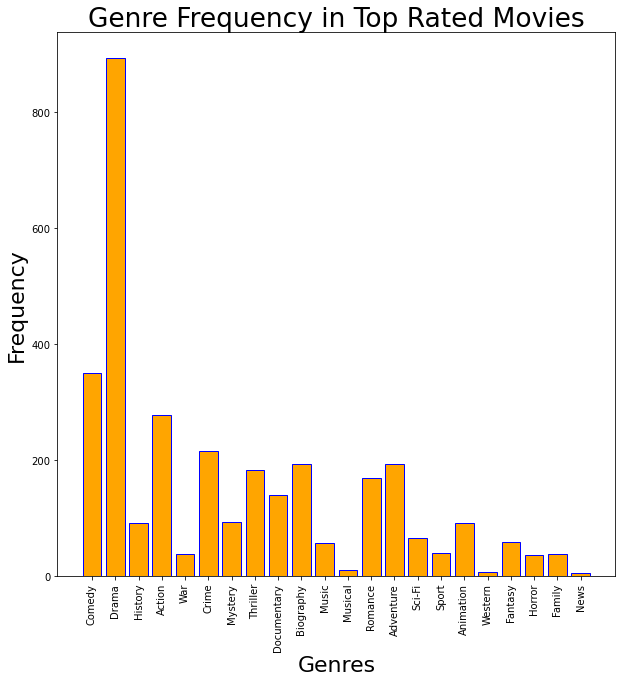

In [47]:
# Plotting the genre frequency in a bar chart
plt.figure(figsize=(10,10))
#create variables for x and y values
x_val = list(genre_count_dict.keys())
y_val = genre_count_dict.values()
#plotting the bar chart
plt.bar(x_val,y_val, color='orange', edgecolor='b')
#make the bar chart look nicer
plt.rc('font', size = 22)
plt.rc('axes', labelsize=12)
plt.xticks(rotation=90)
plt.ylabel('Frequency',size=22)
plt.xlabel('Genres', size=22)
plt.title("Genre Frequency in Top Rated Movies")

## Data Analysis - Genres
It looks like almost 70% of the movies are categorized as some sort of Drama.  I suspect that this is a generic term and that there are very few movies just listed.  

We will want to go back and look at ratings by genre

# Average Movie Rating per Genre
Now let's find the average rating of movies that classify in each of these categories. 

Creating a new query to get a df with all of the movies. Copy from above

In [48]:
q= """SELECT 
             primary_title as Title,
             start_year as Year,
             genres as Genre,
             averagerating as Rating,
             numvotes as Votes
        FROM movie_basics
        JOIN movie_ratings
             USING(movie_id)
       
            
                 ;"""
all_df = pd.read_sql(q,conn)
all_df

,Title,Year,Genre,Rating,Votes
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,None,6.6,5


 ## Data Cleaning
 Clean up the all_df to change None to 'no genre'
This will make it possible to use the same code from above to create sub genre columns, which we will need to find the average ratings for each sub category.

In [49]:
#How many of these movies do not have a genre
all_df['Genre'].isna().value_counts()  

#looks like None is entered -- we can change those to 'no genre'
all_df['Genre'] = all_df['Genre'].map(lambda x: 'no genre' if x == None else x)



        

In [50]:
all_df

,Title,Year,Genre,Rating,Votes
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,no genre,6.6,5


In [51]:
#use the subgenre code from above on the all_df
for g in genre_list:
    all_df[g] = all_df['Genre'].map(lambda x: g in x)
all_df 

,Title,Year,Genre,Rating,Votes,Comedy,Drama,History,Action,War,...,Romance,Adventure,Sci-Fi,Sport,Animation,Western,Fantasy,Horror,Family,News
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,The Other Side of the Wind,2018,Drama,6.9,4517,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
73853,Albatross,2017,Documentary,8.5,8,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73854,La vida sense la Sara Amat,2019,no genre,6.6,5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
#get descriptive stats for each numerical category
all_df.describe()

,Year,Rating,Votes
count,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,6.332729,3.523662e+03
std,2.614807,1.474978,3.029402e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,4.900000e+01
75%,2016.000000,7.400000,2.820000e+02
max,2019.000000,10.000000,1.841066e+06


In [53]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        73856 non-null  object 
 1   Year         73856 non-null  int64  
 2   Genre        73856 non-null  object 
 3   Rating       73856 non-null  float64
 4   Votes        73856 non-null  int64  
 5   Comedy       73856 non-null  bool   
 6   Drama        73856 non-null  bool   
 7   History      73856 non-null  bool   
 8   Action       73856 non-null  bool   
 9   War          73856 non-null  bool   
 10  Crime        73856 non-null  bool   
 11  Mystery      73856 non-null  bool   
 12  Thriller     73856 non-null  bool   
 13  Documentary  73856 non-null  bool   
 14  Biography    73856 non-null  bool   
 15  Music        73856 non-null  bool   
 16  Musical      73856 non-null  bool   
 17  Romance      73856 non-null  bool   
 18  Adventure    73856 non-null  bool   
 19  Sci-

## Get Average Mean for a Genre
Get the average rating for all comedy movies.  

In [54]:
#Trying to get the average for all movies that mark true for each category
#Testing logic on comedy column
Comedy_df = all_df[all_df['Comedy']==True]
comedy_mean = Comedy_df['Rating'].mean()
comedy_mean

6.0026894158473105

## Most Common Genres
From our bar chart above, we can see that the most common genres are Drama, Comedy, Action, Crime, Thriller, Biography, Romance and Adventure - Creating dataframe for each of these and storing their means in a list to use for data visualization.  Allso inclued the rating mean for all_df.

In [55]:
#dictionary of dataframes, means
dataframes ={}
#add the all_df mean Comedy_df mean from above
dataframes['All'] = all_df['Rating'].mean()
dataframes['Comedy'] = comedy_mean
dataframes


{'All': 6.332728552859619, 'Comedy': 6.0026894158473105}

## Top Genre Means

In [56]:
#now add the rest of the means(I gave up on trying to loop the creation of dataframes.)
#combine the logic from above except subtract the all_df.mean from each value for comparison
#should write a function - looping was difficult...

#drama movies

Drama_df = all_df[all_df['Drama']==True]
drama_mean = Drama_df['Rating'].mean()
dataframes['Drama'] = drama_mean 

# action movies
Action_df = all_df[all_df['Action']==True]
action_mean = Action_df['Rating'].mean()
dataframes['Action'] = action_mean

# crime movies
Crime_df = all_df[all_df['Crime']==True]
crime_mean = Crime_df['Rating'].mean()
dataframes['Action'] = crime_mean

#Thriller movies
Thriller_df = all_df[all_df['Thriller']==True]
thriller_mean = Thriller_df['Rating'].mean()
dataframes['Thriller'] = thriller_mean

#biographies
Biography_df = all_df[all_df['Biography']==True]
biography_mean = Biography_df['Rating'].mean()
dataframes['Biography'] = biography_mean

#romance movies
Romance_df = all_df[all_df['Romance']==True]
romance_mean = Romance_df['Rating'].mean()
dataframes['Romance'] = romance_mean

#adventure movies
Adventure_df = all_df[all_df['Adventure']==True]
adventure_mean = Adventure_df['Rating'].mean()
dataframes['Adventure'] = adventure_mean

dataframes

{'All': 6.332728552859619,
 'Comedy': 6.0026894158473105,
 'Drama': 6.401559048980123,
 'Action': 6.115441335935806,
 'Thriller': 5.639114031885116,
 'Biography': 7.1622735626148595,
 'Romance': 6.146607983001973,
 'Adventure': 6.196201205134923}

## Data Visualization - Genre Average Rating 
Create a chart to compare the means of each genre of movies.  Try to plot the difference of each value from the average

(4.0, 9.0)

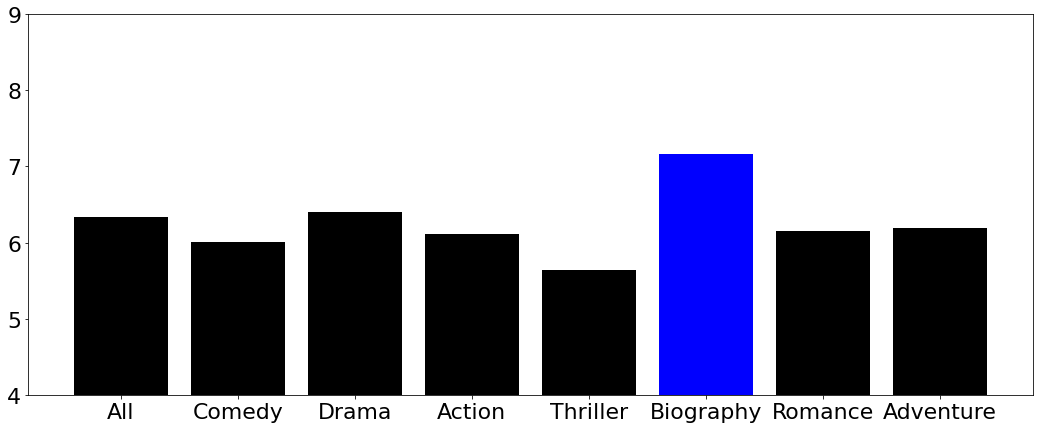

In [57]:
#plotting the genre averages
plt.figure(figsize=(18,7))
c = ["black","black","black","black","black","b","black","black"]
x_val = list(dataframes.keys())
y_val = dataframes.values()
plt.bar(x_val,y_val, color = c)
plt.ylim(4,9)


## Genre Average Rating Analysis
Biographies are the highest rated movie genre
Data suggest that most genres fall right around the 6 out of 10 rating. 
This suggest that movie genre has little affect on rating.  This would have to be explored further...
